# Project

In [49]:
import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 100

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.manifold import TSNE
from sklearn.model_selection import KFold


os.chdir('C:/Users/RH/Documents/GeekBrains/DataScience course/Numpy, Pandas, Sklearn/Project')

In [50]:
df_train = pd.read_csv('train.csv', sep = ',', encoding = 'utf8')
df_test = pd.read_csv('test.csv', sep = ',', encoding = 'utf8')

df_train = df_train.rename(columns={"Helthcare_2": "Healthcare_2"}) #исправляем орфографическую ошибку
df_test = df_test.rename(columns={"Helthcare_2": "Healthcare_2"}) #исправляем орфографическую ошибку

#df_train['HouseYear'].sort_values(ascending=False)
df_train['HouseYear'].replace({20052011: 2005, 4968: 1968}, inplace=True) #заменяем нереалистичные данные

#заменяем буквы на цифры в категориальных переменных
df_train['Ecology_2'].replace({'A': 0, 'B': 1}, inplace=True)
df_train['Ecology_3'].replace({'A': 0, 'B': 1}, inplace=True)
df_train['Shops_2'].replace({'A': 0, 'B': 1}, inplace=True)

df_test['Ecology_2'].replace({'A': 0, 'B': 1}, inplace=True)
df_test['Ecology_3'].replace({'A': 0, 'B': 1}, inplace=True)
df_test['Shops_2'].replace({'A': 0, 'B': 1}, inplace=True)

#удаляем кривые данные и заменяем нереалистичные по площади кухни
df_train = df_train.drop(df_train[df_train['KitchenSquare'] >= 1000].index)
df_train = df_train.drop(df_train[df_train['LifeSquare'] >= 4000].index)
df_train = df_train.drop(df_train[df_train['Square'] >= 250].index)
df_test['KitchenSquare'] = np.where(df_test['KitchenSquare'] >= 200, np.median(df_test['KitchenSquare']) , df_test['KitchenSquare'])


In [51]:
class EDA:
        
    def __init__(self, df):
        self.df = df
    
    def shape(self):
        return self.df.shape
    
    def nan(self):
        return self.df.isna().sum()

    def types(self):
        return self.df.dtypes
    
    def describe(self):
        return self.df.describe().T
    

eda_train = EDA(df_train)
eda_test = EDA(df_test)

In [66]:
#print('train shape : \n {} \n'.format(eda_train.shape()))
print('train nan stat : \n {} \n'.format(eda_train.nan()))
#print('train data types : \n {} \n'.format(eda_train.types()))
#print('train describe : \n {} \n'.format(eda_train.describe()))

train nan stat : 
 Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2112
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1        0
Healthcare_2        0
Shops_1             0
Shops_2             0
Price               0
1FloorHouse         0
1Floor              0
Studio              0
dtype: int64 



In [67]:
#print('test shape : \n {} \n'.format(eda_test.shape()))
print('test nan stat : \n {} \n'.format(eda_test.nan()))
#print('test data types : \n {} \n'.format(eda_test.types()))
#print('test describe : \n {} \n'.format(eda_test.describe()))

test nan stat : 
 Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1        0
Healthcare_2        0
Shops_1             0
Shops_2             0
1FloorHouse         0
1Floor              0
Studio              0
dtype: int64 



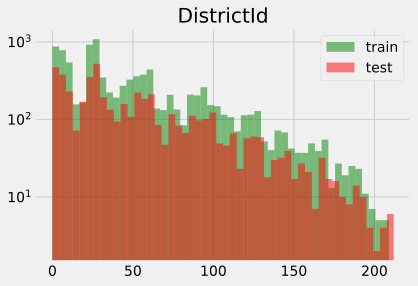

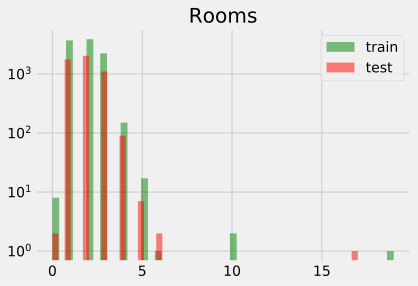

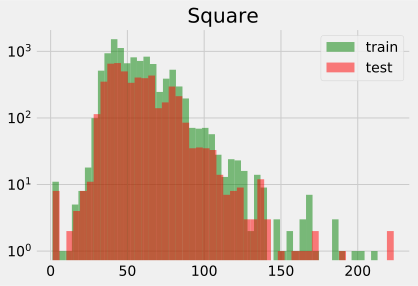

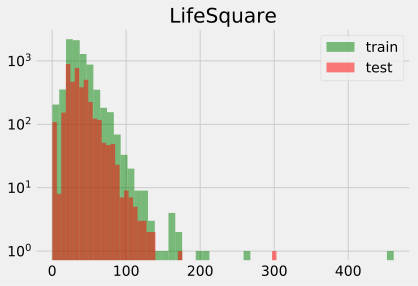

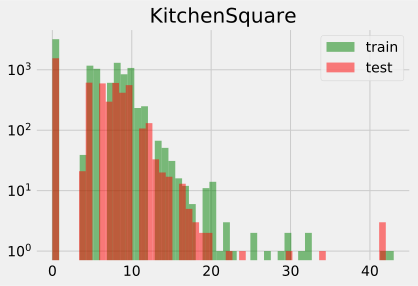

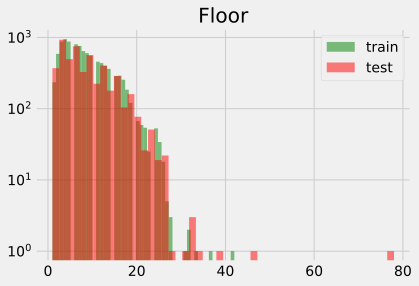

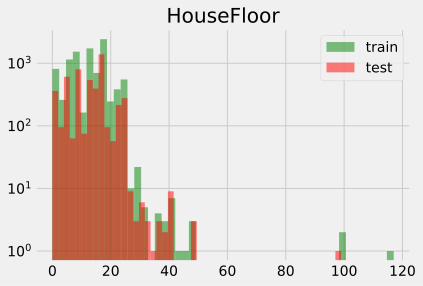

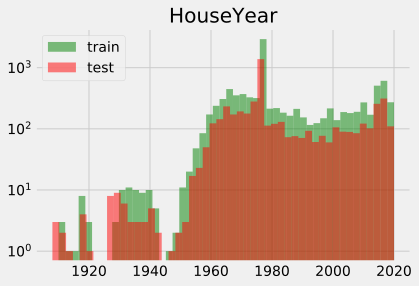

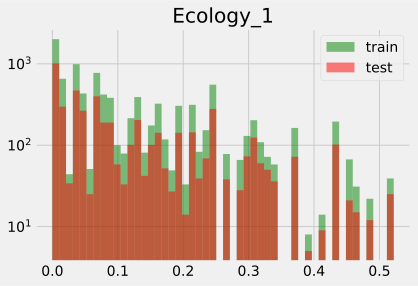

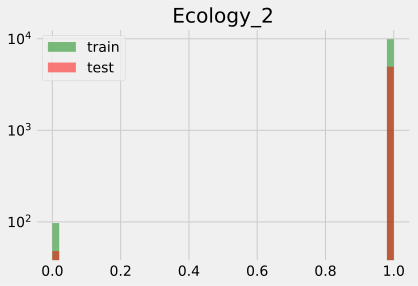

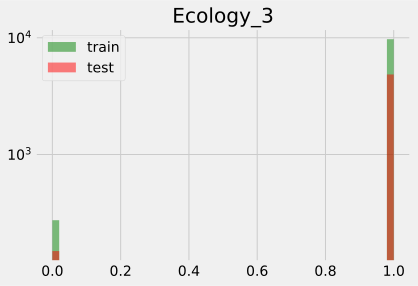

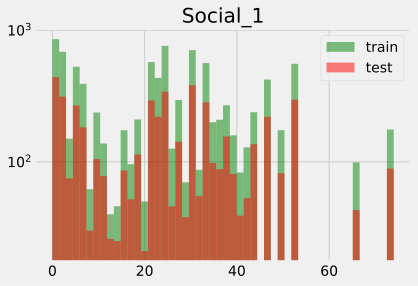

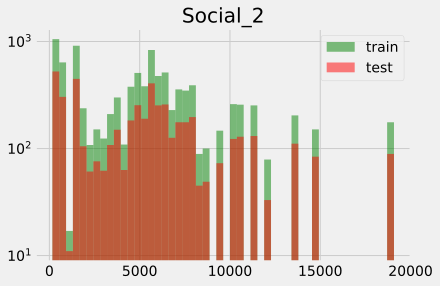

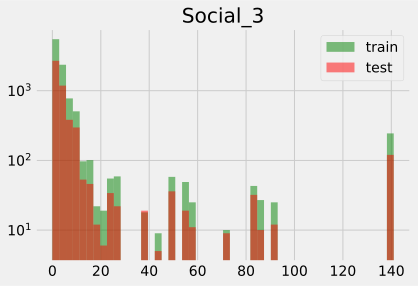

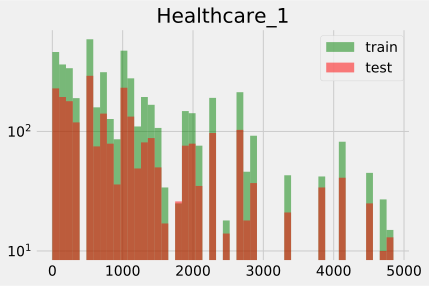

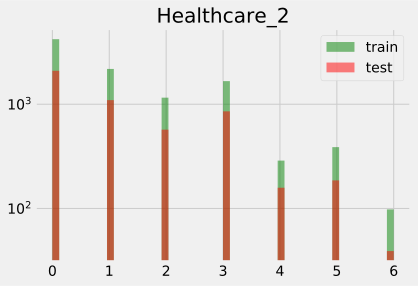

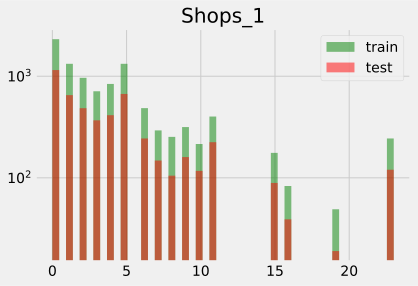

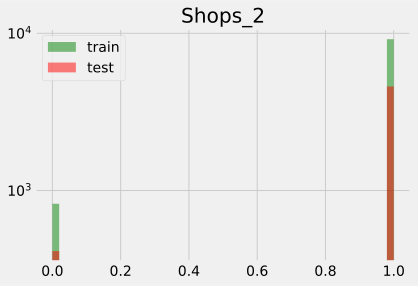

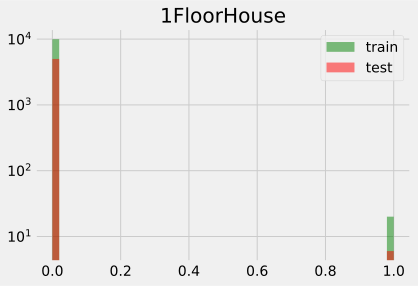

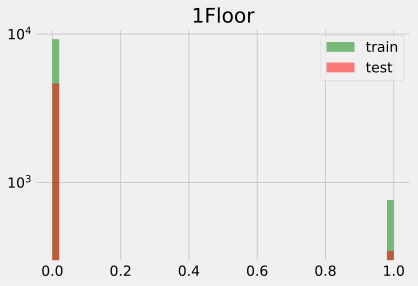

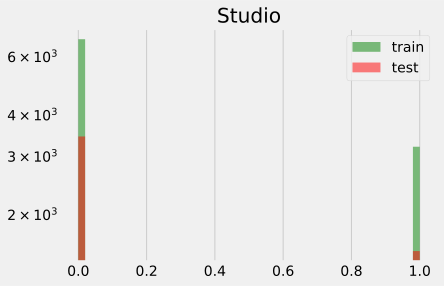

In [57]:
def compare(feature):

    plt.hist(df_train[feature], bins=50, alpha  = 0.5, color = 'green', label='train')
    plt.hist(df_test[feature], bins=50, alpha  = 0.5, color = 'red', label='test')
    plt.title(feature)
    plt.legend()
    plt.yscale('log')
    plt.show()

for i in range(1, len(df_test.columns)):
    compare(df_test.columns[i])

In [65]:
df_train['1FloorHouse'] = np.where((df_train['HouseFloor']<=1) & (df_train['Floor']<=1), 1, 0)
df_test['1FloorHouse'] = np.where((df_test['HouseFloor']<=1) & (df_test['Floor']<=1), 1, 0)

df_train['1Floor'] = np.where((df_train['HouseFloor']>1) & (df_train['Floor']<=2), 1, 0)
df_test['1Floor'] = np.where((df_test['HouseFloor']>1) & (df_test['Floor']<=2), 1, 0)

df_train['KitchenSquare'] = np.where(df_train['KitchenSquare']/df_train['Square']>=0.85, 0, df_train['KitchenSquare'])
df_test['KitchenSquare'] = np.where(df_test['KitchenSquare']/df_test['Square']>=0.85, 0, df_test['KitchenSquare'])

df_train['KitchenSquare'] = np.where(df_train['KitchenSquare'] <=3, 0, df_train['KitchenSquare'])
df_test['KitchenSquare'] = np.where(df_test['KitchenSquare'] <=3, 0, df_test['KitchenSquare'])

df_train['Studio'] = np.where(df_train['KitchenSquare'] == 0, 1, 0)
df_test['Studio'] = np.where(df_test['KitchenSquare'] == 0, 1, 0)

df_train['Healthcare_1'] = np.where(np.isnan(df_train['Healthcare_1']), np.mean(df_train['Healthcare_1']), df_train['Healthcare_1'])
df_test['Healthcare_1'] = np.where(np.isnan(df_test['Healthcare_1']), np.mean(df_test['Healthcare_1']), df_test['Healthcare_1'])

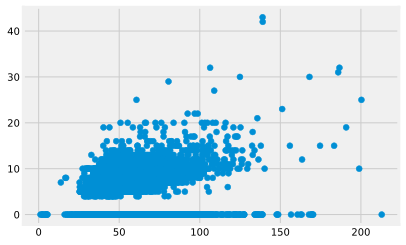

In [44]:
plt.scatter(df_train['Square'], df_train['KitchenSquare'])
plt.show()

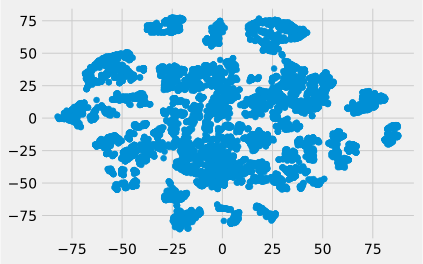

In [173]:

# , 'Shops_2' 'Ecology_2', 'Ecology_3',
features = ['Square', 'Floor', 'Rooms', 'HouseYear', 'Ecology_1',  'Social_1', 'Social_2', 'Social_2', 
         'Healthcare_2', 'Shops_1']

x_sc = scaler.fit(df_train[features].values)
x_train_sc = x_sc.transform(df_train[features].values)

tsne = TSNE(n_components=2, perplexity = 45, learning_rate=150, random_state=100)
x_train_tsne = tsne.fit_transform(x_train_sc)

plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])
plt.show()

In [230]:


"""
#df_train['Ecology_2'] = df_train['Ecology_2'].astype('category')
#df_train['Ecology_3'] = df_train['Ecology_3'].astype('category')
#df_train['Shops_2'] = df_train['Shops_2'].astype('category')


category = ['Ecology_2', 'Ecology_3', 'Shops_2']


from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

x_ohe = ohe.fit(df_train[category])
x_ohe.categories_
x_ohe.get_feature_names(['Ecology_2', 'Ecology_3', 'Shops_2'])
x_train_ohe = x_ohe.transform(df_train[category]).toarray() 

#concatenated_data = pd.concat([df_train, x_train_ohe], axis=1)
x_train_ohe = pd.DataFrame(x_train_ohe, index=df_train.index, 
                           columns = x_ohe.get_feature_names(['Ecology_2', 'Ecology_3', 'Shops_2']))
x_train_ohe.head(5)
"""


"\n#df_train['Ecology_2'] = df_train['Ecology_2'].astype('category')\n#df_train['Ecology_3'] = df_train['Ecology_3'].astype('category')\n#df_train['Shops_2'] = df_train['Shops_2'].astype('category')\n\n\ncategory = ['Ecology_2', 'Ecology_3', 'Shops_2']\n\n\nfrom sklearn.preprocessing import OneHotEncoder\nohe = OneHotEncoder()\n\nx_ohe = ohe.fit(df_train[category])\nx_ohe.categories_\nx_ohe.get_feature_names(['Ecology_2', 'Ecology_3', 'Shops_2'])\nx_train_ohe = x_ohe.transform(df_train[category]).toarray() \n\n#concatenated_data = pd.concat([df_train, x_train_ohe], axis=1)\nx_train_ohe = pd.DataFrame(x_train_ohe, index=df_train.index, \n                           columns = x_ohe.get_feature_names(['Ecology_2', 'Ecology_3', 'Shops_2']))\nx_train_ohe.head(5)\n"

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

target = 'Price'
# , 'Shops_2' 'Ecology_2', 'Ecology_3', '1FloorHouse', '1Floor', 'Studio'
features = ['DistrictId', 'Square',  'KitchenSquare', 'Floor', 'Rooms', 'HouseYear', 'Ecology_1', 
            'Social_1', 'Social_2', 'Social_2', 'Healthcare_1', 'Healthcare_2', 'Shops_1'
            ]

y = df_train[target].values.ravel()
x = df_train[features].values

param_grid  = {'max_depth':[15, 16, 17, 18, 19, 20],
                'min_samples_split':[2],
                'min_samples_leaf':[1]}

rf = RandomForestRegressor(n_estimators= 100,
                             criterion='mse',                           
                             min_weight_fraction_leaf=0.0,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             min_impurity_split=None,
                             bootstrap=True,
                             oob_score=False,
                             random_state=1,
                             verbose=0,
                             warm_start=False)

grid = GridSearchCV(rf, param_grid = param_grid, cv = 10, 
                    scoring = 'r2') 

grid.fit(x, y)

print(grid.best_estimator_)

print(grid.best_score_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)
0.7275408024143072


In [74]:
model = grid.best_estimator_.fit(x, y)
feach_import = np.vstack((features, np.round(model.feature_importances_,2))).T
feach_import

array([['DistrictId', '0.06'],
       ['Square', '0.41'],
       ['KitchenSquare', '0.03'],
       ['Floor', '0.04'],
       ['Rooms', '0.08'],
       ['HouseYear', '0.05'],
       ['Ecology_1', '0.04'],
       ['Social_1', '0.1'],
       ['Social_2', '0.06'],
       ['Social_2', '0.06'],
       ['Healthcare_1', '0.04'],
       ['Healthcare_2', '0.01'],
       ['Shops_1', '0.02']], dtype='<U32')

Прогноз

In [75]:
x_test = df_test[features].values
y_test = np.round(model.predict(x_test),1)

In [76]:
output = np.vstack([df_test['Id'].values, y_test]).T

output = pd.DataFrame(output)
output.columns = ['Id', 'Price']
output['Id'] = pd.to_numeric(output['Id'], downcast='integer')

output.to_csv('output.csv', index=False, sep= ',')

In [77]:
output.head()

Id     Price
0    725  158052.7
1  15856  227027.4
2   5480  134134.7
3  15664  371020.2
4  14275  141446.1

In [233]:
df_train[df_train['Rooms'] == 0]

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1397  12638          27    0.0  138.427694  136.215499            0.0      4   
1981   7917          27    0.0  212.932361  211.231125            0.0      2   
2269   7317          27    0.0   41.790881         NaN            0.0     13   
3911    770          28    0.0   49.483501         NaN            0.0     16   
4366    456           6    0.0   81.491446         NaN            0.0      4   
4853   3224          27    0.0    2.377248    0.873147            0.0      1   
6149   3159          88    0.0   38.697117   19.345131            9.0      9   
8834   9443          27    0.0   87.762616   85.125471            0.0      5   

      HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  \
1397         3.0       2016   0.075424          1          1        11   
1981         3.0       2008   0.211401          1          1         9   
2269         0.0       1977   0.211401          1          1         9   
3911         0.0       2015   0.118537          1          1        30   
4366         0.0       1977   0.243205          1          1         5   
4853         0.0       1977   0.017647          1          1         2   
6149        16.0       1982   0.127376          1          1        43   
8834        15.0       1977   0.211401          1          1         9   

      Social_2  Social_3  Healthcare_1  Healthcare_2  Shops_1  Shops_2  \
1397      3097         0           NaN             0        0        1   
1981      1892         0           NaN             0        1        1   
2269      1892         0           NaN             0        1        1   
3911      6207         1        1183.0             1        0        1   
4366      1564         0         540.0             0        0        1   
4853       469         0           NaN             0        0        1   
6149      8429         3           NaN             3        9        1   
8834      1892         0           NaN             0        1        1   

              Price  
1397  268394.744389  
1981  302211.260887  
2269   98129.976788  
3911  217009.338463  
4366  212864.799112  
4853  126596.941798  
6149  158998.110646  
8834  219281.918007